## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf  
import numpy as np

from keras.datasets import mnist
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import (  
    Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten,
    BatchNormalization
)

## Split Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


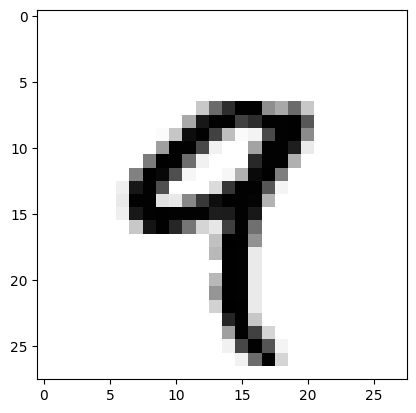

In [4]:
plt.imshow(X_train[4],cmap='binary')

## Preprocess Data and Visualize Samples

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0  # Reshape to (28, 28, 1) and normalize
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0    # Reshape to (28, 28, 1) and normalize

# One-hot encode the labels
y_train = tf.one_hot(y_train, 10)   # One-hot encode training labels
y_test = tf.one_hot(y_test, 10)     # One-hot encode testing labels


[Text(0.5, 1.0, 'label: 1')]

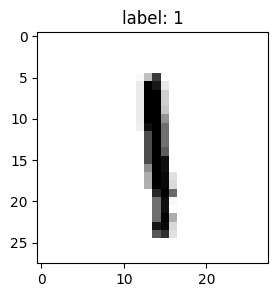

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))
axes.imshow(X_train[i].squeeze(), cmap='binary')  # Display image
digit = np.argmax(y_train[i])                     # Get the label
axes.set(title = f"label: {digit}")               # Set title

## Define the Model

In [8]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),  # First convolutional layer
    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),                           # Second convolutional layer
    
    MaxPooling2D(pool_size=(2,2)),  # First max-pooling layer
    BatchNormalization(),           # Batch normalization
    
    Conv2D(filters=128, kernel_size=(3,3), activation="relu"),  # Third convolutional layer
    Conv2D(filters=128, kernel_size=(3,3), activation="relu"),  # Fourth convolutional layer
    
    MaxPooling2D(pool_size=(2,2)),  # Second max-pooling layer
    BatchNormalization(),           # Batch normalization
    
    Conv2D(filters=256, kernel_size=(3,3), activation="relu"),  # Fifth convolutional layer
    
    MaxPooling2D(pool_size=(2,2)),  # Third max-pooling layer
    Flatten(),                      # Flatten the output
    BatchNormalization(),           # Batch normalization
    
    Dense(512, activation="relu"),  # Fully connected layer with 512 units
    Dropout(0.5),                   # Dropout for regularization
    Dense(10, activation="softmax") # Output layer with 10 units (one for each class)
])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

## Compile and Train the Model

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=3,
    validation_split=0.2
)


750/750 [==============================] - 295s 388ms/step - loss: 0.1153 - accuracy: 0.9646 - val_loss: 0.0522 - val_accuracy: 0.9847


 ## Make Predictions and Visualize Results

In [10]:
y_pred = model.predict(X_test)

313/313 [==============================] - 16s 49ms/step


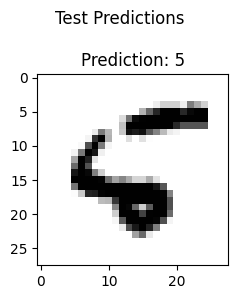

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3))
axes.imshow(X_test[i].squeeze(), cmap='binary')  # Display image
digit = np.argmax(y_test[i])                   # Get the true label
axes.set(title = f"Prediction: {digit}")         # Set title
fig.suptitle("Test Predictions")
fig.tight_layout()
